In [21]:
%matplotlib inline

import pandas as pd


In [22]:
# Download the Iris Dataset from the website, then load it into a pandas DataFrame

import urllib

# Download the data set over http
iris_http_handle = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

# Load the data set into a DataFrame
# read_csv likes reading from a file handle, which is 
iris_df = pd.read_csv(iris_http_handle, \
                      sep=',', \
                      header=None, \
                      names=['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'iris'])

# Show the first few lines of the DataFrame to show it got loaded nicely in the data frame
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Number of rows
len(iris_df)

150

In [24]:
# you can create a new DataFrame with just some columns
iris_df[['sepallength', 'sepalwidth']].head() 

,sepallength,sepalwidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [25]:
# You can filter rows by a condition
iris_df[(iris_df.sepalwidth > 3.5) & (iris_df.sepallength > 5.0) ]

,sepallength,sepalwidth,petallength,petalwidth,iris
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [26]:
# Wait, what? how does it do that?

# These return a Series with True/False values
(iris_df.sepalwidth > 3.5).head()

# Using & does "and" across both series, returning a new list of T/F
# This is then passed into the data frame which pulls the indexes and makes a new DF

0    False
1    False
2    False
3    False
4     True
Name: sepalwidth, dtype: bool

In [27]:
# groupby is useful to do aggregate analysis
# groupby creates a GroupBy object which then has functions like "size" to operate on the groups

iris_df.groupby('iris').size() # See how many of each label there are

iris
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [28]:
# I really like to take a look at some basic information about each feature
# "agg" works on a GroupBy object and lets you do several kinds of aggregations at once

iris_df.groupby('iris').agg(['min', 'mean', 'max', 'std']) # Average of each feature, by label

sepallength                       sepalwidth              \
                        min   mean  max       std        min   mean  max   
iris                                                                       
Iris-setosa             4.3  5.006  5.8  0.352490        2.3  3.418  4.4   
Iris-versicolor         4.9  5.936  7.0  0.516171        2.0  2.770  3.4   
Iris-virginica          4.9  6.588  7.9  0.635880        2.2  2.974  3.8   

                          petallength                       petalwidth         \
                      std         min   mean  max       std        min   mean   
iris                                                                            
Iris-setosa      0.381024         1.0  1.464  1.9  0.173511        0.1  0.244   
Iris-versicolor  0.313798         3.0  4.260  5.1  0.469911        1.0  1.326   
Iris-virginica   0.322497         4.5  5.552  6.9  0.551895        1.4  2.026   

                                
                 max       std  
iris                            
Iris-setosa      0.6  0.107210  
Iris-versicolor  1.8  0.197753  
Iris-virginica   2.5  0.274650

In [29]:
# DataFrames have a really useful correlation coefficient matrix

iris_df.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


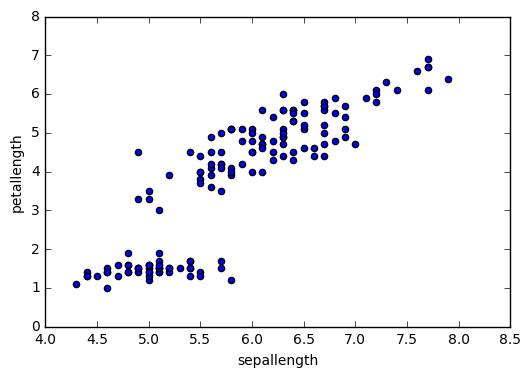

In [30]:
# Pandas make it really easy to make simple plots

iris_df.plot(x='sepallength', y='petallength', kind='scatter')

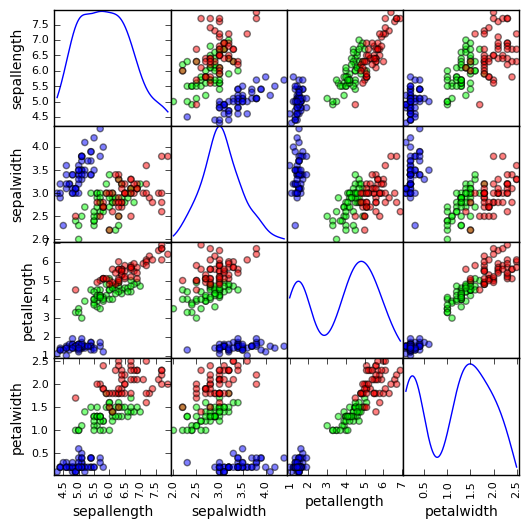

In [31]:
# You can get really wild with plotting. One of my favorites is scatter_matrix

from pandas.tools.plotting import scatter_matrix

# I need to make a color map to make the dots show up in the right colors
color_map = {'Iris-setosa': "#0000ff", 'Iris-versicolor' : "#00ff00", 'Iris-virginica' : "#ff0000"}
colors_s = iris_df['iris'].map(lambda x : color_map[x])

# Make the scatter plot
_ = scatter_matrix(iris_df, alpha=0.5, figsize=(6, 6), diagonal='kde', marker='o', c=colors_s)


In [32]:
# Let's use decision trees on the iris data set:
# Derived from http://scikit-learn.org/stable/modules/tree.html

from sklearn import tree

# Instatiate the classifier
clf_dt = tree.DecisionTreeClassifier()

# Names of the features
feature_list = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

# Do the training
clf_dt = clf_dt.fit(iris_df[feature_list], iris_df['iris'])

# Show that we can plug things in and get some output
print(clf_dt.predict([[5.0, 3.5, 1.5, 0.5], [6.5, 3.0, 6.0, 2.4]]))


['Iris-setosa' 'Iris-virginica']


In [34]:
# Plot the decision tree that was trained

from IPython.display import Image 
import pydotplus
dot_data = tree.export_graphviz(clf_dt,  \
                                feature_names=feature_list, \
                                class_names=color_map.keys(), \
                                out_file=None)  

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# There is something wrong with this tree... what is it?

TypeError: 'dict_keys' object does not support indexing

In [35]:
from sklearn.model_selection import cross_val_score

folds = 10

# Instatiate the classifier
clf_dt = tree.DecisionTreeClassifier()

cv = cross_val_score(clf_dt, iris_df[feature_list], iris_df['iris'], cv=folds)

print(cv)
print('average:', sum(cv) / folds)

ImportError: No module named 'sklearn.model_selection'